In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np


# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Only look at 3s and 8s
train_picks = np.logical_or(y_train==2,y_train==7)
test_picks = np.logical_or(y_test==2,y_test==7)

x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==7,dtype=int)
y_test = np.array(y_test[test_picks]==7,dtype=int)


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


x_train shape: (12223, 28, 28, 1)
12223 train samples
2060 test samples


In [2]:
from keras.wrappers.scikit_learn import KerasClassifier

# def make_model( ):    
def make_model(optimizer='adam'):
    dense_layer_sizes = [64]
    pool_size = (2, 2)
    filters = 8
    kernel_size = (3, 3)
    
    model = Sequential()
    model.add(Conv2D(4, kernel_size,activation='relu',input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])    
    
    return model


In [3]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.grid_search import GridSearchCV

batch_size = [10, 50, 100, 150, 200, 250]
# epochs = [10, 50, 100]

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(batch_size=batch_size, optimizer=optimizer)
# param_grid = dict(batch_size=batch_size, epochs=epochs)

my_classifier = KerasClassifier(make_model, epochs=10)
# my_classifier = KerasClassifier(make_model)
grid = GridSearchCV(my_classifier,param_grid=param_grid, 
#                 scoring='accuracy',
#                 scoring='neg_log_loss',                    
                  scoring='roc_auc',
                    verbose=0,
                    n_jobs=1)

In [4]:
grid_result=grid.fit(x_train, y_train)

Epoch 1/12
8148/8148 [==============================] - 5s - loss: 0.2142 - acc: 0.9249     
Epoch 2/12
8148/8148 [==============================] - 3s - loss: 0.1114 - acc: 0.9704     
Epoch 3/12
8148/8148 [==============================] - ETA: 0s - loss: 0.0970 - acc: 0.970 - 3s - loss: 0.0965 - acc: 0.9705     
Epoch 4/12
8148/8148 [==============================] - 3s - loss: 0.0741 - acc: 0.9762     
Epoch 5/12
8148/8148 [==============================] - 3s - loss: 0.0671 - acc: 0.9823     
Epoch 6/12
8148/8148 [==============================] - 3s - loss: 0.0689 - acc: 0.9797     
Epoch 7/12
8148/8148 [==============================] - 3s - loss: 0.0660 - acc: 0.9810     
Epoch 8/12
8148/8148 [==============================] - 3s - loss: 0.0571 - acc: 0.9834     
Epoch 9/12
8148/8148 [==============================] - 3s - loss: 0.0537 - acc: 0.9839     
Epoch 10/12
8148/8148 [==============================] - 3s - loss: 0.0554 - acc: 0.9842     
Epoch 11/12
8148/8148 [========

8149/8149 [==============================] - 4s - loss: 0.1261 - acc: 0.9602     
Epoch 2/12
8149/8149 [==============================] - 4s - loss: 0.0933 - acc: 0.9764     
Epoch 3/12
8149/8149 [==============================] - 4s - loss: 0.0836 - acc: 0.9788     
Epoch 4/12
8149/8149 [==============================] - 4s - loss: 0.0738 - acc: 0.9804     
Epoch 5/12
8149/8149 [==============================] - 4s - loss: 0.0716 - acc: 0.9818     
Epoch 6/12
8149/8149 [==============================] - 4s - loss: 0.0707 - acc: 0.9786     
Epoch 7/12
8149/8149 [==============================] - 4s - loss: 0.0696 - acc: 0.9806     
Epoch 8/12
8149/8149 [==============================] - 4s - loss: 0.0648 - acc: 0.9811     
Epoch 9/12
8149/8149 [==============================] - 4s - loss: 0.0623 - acc: 0.9804     
Epoch 10/12
8149/8149 [==============================] - 4s - loss: 0.0606 - acc: 0.9822     
Epoch 11/12
8149/8149 [==============================] - 4s - loss: 0.0614 - acc

8149/8149 [==============================] - 4s - loss: 0.1093 - acc: 0.9632     
Epoch 2/12
8149/8149 [==============================] - 4s - loss: 0.0587 - acc: 0.9806     
Epoch 3/12
8149/8149 [==============================] - 4s - loss: 0.0480 - acc: 0.9842     
Epoch 4/12
8149/8149 [==============================] - 4s - loss: 0.0396 - acc: 0.9882     
Epoch 5/12
8149/8149 [==============================] - 4s - loss: 0.0350 - acc: 0.9902     
Epoch 6/12
8149/8149 [==============================] - 4s - loss: 0.0289 - acc: 0.9903     
Epoch 7/12
8149/8149 [==============================] - 4s - loss: 0.0284 - acc: 0.9904     
Epoch 8/12
8149/8149 [==============================] - 4s - loss: 0.0255 - acc: 0.9915     
Epoch 9/12
8149/8149 [==============================] - 4s - loss: 0.0238 - acc: 0.9928     
Epoch 10/12
8149/8149 [==============================] - 4s - loss: 0.0229 - acc: 0.9936     
Epoch 11/12
8149/8149 [==============================] - 4s - loss: 0.0215 - acc

8148/8148 [==============================] - 1s - loss: 0.5792 - acc: 0.6922     
Epoch 2/12
8148/8148 [==============================] - 0s - loss: 0.2505 - acc: 0.9151     
Epoch 3/12
8148/8148 [==============================] - 0s - loss: 0.1454 - acc: 0.9531     
Epoch 4/12
8148/8148 [==============================] - 0s - loss: 0.1180 - acc: 0.9628     
Epoch 5/12
8148/8148 [==============================] - 0s - loss: 0.1009 - acc: 0.9672     
Epoch 6/12
8148/8148 [==============================] - 0s - loss: 0.0887 - acc: 0.9707     
Epoch 7/12
8148/8148 [==============================] - 0s - loss: 0.0879 - acc: 0.9723     
Epoch 8/12
8148/8148 [==============================] - 0s - loss: 0.0810 - acc: 0.9719     
Epoch 9/12
8148/8148 [==============================] - 0s - loss: 0.0774 - acc: 0.9741     
Epoch 10/12
8148/8148 [==============================] - 0s - loss: 0.0749 - acc: 0.9746     
Epoch 11/12
8148/8148 [==============================] - 0s - loss: 0.0717 - acc

8148/8148 [==============================] - 0s - loss: 0.0524 - acc: 0.9883     
Epoch 11/12
8148/8148 [==============================] - 0s - loss: 0.0545 - acc: 0.9883     
Epoch 12/12
8148/8148 [==============================] - 0s     
Epoch 1/12
8149/8149 [==============================] - 1s - loss: 0.0886 - acc: 0.9667     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.0529 - acc: 0.9837     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0408 - acc: 0.9847     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0374 - acc: 0.9894     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0345 - acc: 0.9894     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0312 - acc: 0.9903     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0286 - acc: 0.9903     
Epoch 8/12
8149/8149 [==============================] - 0s - loss: 0.0276 - acc: 0.9921     
Epoch 9/12
8149

8149/8149 [==============================] - 0s - loss: 0.0353 - acc: 0.9903     
Epoch 11/12
8149/8149 [==============================] - 0s - loss: 0.0301 - acc: 0.9912     
Epoch 12/12
8149/8149 [==============================] - 1s - loss: 0.1557 - acc: 0.9429     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.0669 - acc: 0.9788     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0586 - acc: 0.9801     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0496 - acc: 0.9838     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0434 - acc: 0.9844     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0419 - acc: 0.9860     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0351 - acc: 0.9880     
Epoch 8/12
8149/8149 [==============================] - 0s - loss: 0.0349 - acc: 0.9883     
Epoch 9/12
8149/8149 [==============================] - 1s - loss: 0.0359 - acc

8149/8149 [==============================] - 1s - loss: 0.0207 - acc: 0.9942     
Epoch 11/12
8149/8149 [==============================] - 1s - loss: 0.0220 - acc: 0.9928     
Epoch 12/12
8148/8148 [==============================] - 1s - loss: 0.4644 - acc: 0.7705     
Epoch 2/12
8148/8148 [==============================] - 0s - loss: 0.2081 - acc: 0.9244     
Epoch 3/12
8148/8148 [==============================] - 0s - loss: 0.1621 - acc: 0.9434     
Epoch 4/12
8148/8148 [==============================] - 0s - loss: 0.1409 - acc: 0.9536     
Epoch 5/12
8148/8148 [==============================] - 0s - loss: 0.1251 - acc: 0.9589     
Epoch 6/12
8148/8148 [==============================] - 0s - loss: 0.1210 - acc: 0.9607     
Epoch 7/12
8148/8148 [==============================] - 0s - loss: 0.1162 - acc: 0.9639     
Epoch 8/12
8148/8148 [==============================] - 0s - loss: 0.1041 - acc: 0.9675     
Epoch 9/12
8148/8148 [==============================] - 0s - loss: 0.1003 - acc

8148/8148 [==============================] - 0s - loss: 0.0422 - acc: 0.9888     
Epoch 11/12
8148/8148 [==============================] - 0s - loss: 0.0430 - acc: 0.9882     
Epoch 12/12
8149/8149 [==============================] - 1s - loss: 0.1192 - acc: 0.9531     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.0551 - acc: 0.9810     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0461 - acc: 0.9832     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0428 - acc: 0.9845     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0416 - acc: 0.9864     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0362 - acc: 0.9870     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0337 - acc: 0.9894     
Epoch 8/12
8149/8149 [==============================] - 0s - loss: 0.0308 - acc: 0.9917     
Epoch 9/12
8149/8149 [==============================] - 0s - loss: 0.0315 - acc

8149/8149 [==============================] - 0s - loss: 0.0278 - acc: 0.9908     
Epoch 11/12
8149/8149 [==============================] - 0s - loss: 0.0232 - acc: 0.9919     
Epoch 12/12
8149/8149 [==============================] - 1s - loss: 0.2093 - acc: 0.9186     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.0668 - acc: 0.9794     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0577 - acc: 0.9801     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0507 - acc: 0.9825     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0493 - acc: 0.9854     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0448 - acc: 0.9874     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0404 - acc: 0.9879     
Epoch 8/12
8149/8149 [==============================] - 0s - loss: 0.0390 - acc: 0.9887     
Epoch 9/12
8149/8149 [==============================] - 0s - loss: 0.0360 - acc

8149/8149 [==============================] - 0s - loss: 0.0231 - acc: 0.9913     
Epoch 11/12
8149/8149 [==============================] - 0s - loss: 0.0260 - acc: 0.9915     
Epoch 12/12
8148/8148 [==============================] - 1s - loss: 0.6575 - acc: 0.6067     
Epoch 2/12
8148/8148 [==============================] - 0s - loss: 0.4999 - acc: 0.7927     
Epoch 3/12
8148/8148 [==============================] - 0s - loss: 0.3354 - acc: 0.8860     
Epoch 4/12
8148/8148 [==============================] - 0s - loss: 0.2460 - acc: 0.9218     
Epoch 5/12
8148/8148 [==============================] - 0s - loss: 0.1937 - acc: 0.9345     
Epoch 6/12
8148/8148 [==============================] - 0s - loss: 0.1727 - acc: 0.9438     
Epoch 7/12
8148/8148 [==============================] - 0s - loss: 0.1578 - acc: 0.9451     
Epoch 8/12
8148/8148 [==============================] - 0s - loss: 0.1459 - acc: 0.9507     
Epoch 9/12
8148/8148 [==============================] - 0s - loss: 0.1425 - acc

8148/8148 [==============================] - 0s - loss: 0.0553 - acc: 0.9880     
Epoch 11/12
8148/8148 [==============================] - 0s - loss: 0.0585 - acc: 0.9863     
Epoch 12/12
8149/8149 [==============================] - 1s - loss: 0.1397 - acc: 0.9486     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.0639 - acc: 0.9829     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0574 - acc: 0.9833     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0536 - acc: 0.9871     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0468 - acc: 0.9874     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0443 - acc: 0.9881     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0423 - acc: 0.9902     
Epoch 8/12
8149/8149 [==============================] - 0s - loss: 0.0431 - acc: 0.9901     
Epoch 9/12
8149/8149 [==============================] - 0s - loss: 0.0382 - acc

8149/8149 [==============================] - 0s - loss: 0.0376 - acc: 0.9888     
Epoch 11/12
8149/8149 [==============================] - 0s - loss: 0.0363 - acc: 0.9886     
Epoch 12/12
8149/8149 [==============================] - 2s - loss: 0.2955 - acc: 0.8871     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.0845 - acc: 0.9726     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0633 - acc: 0.9791     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0596 - acc: 0.9807     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0604 - acc: 0.9805     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0504 - acc: 0.9845     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0453 - acc: 0.9853     
Epoch 8/12
8149/8149 [==============================] - 0s - loss: 0.0426 - acc: 0.9860     
Epoch 9/12
8149/8149 [==============================] - 0s - loss: 0.0395 - acc

8149/8149 [==============================] - 0s - loss: 0.0272 - acc: 0.9923     
Epoch 11/12
8149/8149 [==============================] - 0s - loss: 0.0283 - acc: 0.9925     
Epoch 12/12
8148/8148 [==============================] - 2s - loss: 0.5901 - acc: 0.6850     
Epoch 2/12
8148/8148 [==============================] - 0s - loss: 0.3948 - acc: 0.8355     
Epoch 3/12
8148/8148 [==============================] - 0s - loss: 0.2836 - acc: 0.8829     
Epoch 4/12
8148/8148 [==============================] - 0s - loss: 0.2452 - acc: 0.9086     
Epoch 5/12
8148/8148 [==============================] - 0s - loss: 0.2013 - acc: 0.9235     
Epoch 6/12
8148/8148 [==============================] - 0s - loss: 0.1828 - acc: 0.9383     
Epoch 7/12
8148/8148 [==============================] - 0s - loss: 0.1706 - acc: 0.9445     
Epoch 8/12
8148/8148 [==============================] - 0s - loss: 0.1496 - acc: 0.9487     
Epoch 9/12
8148/8148 [==============================] - 0s - loss: 0.1472 - acc

8148/8148 [==============================] - 0s - loss: 0.0460 - acc: 0.9891     
Epoch 10/12
8148/8148 [==============================] - 0s - loss: 0.0420 - acc: 0.9888     
Epoch 11/12
8148/8148 [==============================] - 0s - loss: 0.0410 - acc: 0.9893     
Epoch 12/12
8149/8149 [==============================] - 2s - loss: 0.1312 - acc: 0.9476     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.0573 - acc: 0.9807     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0501 - acc: 0.9847     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0444 - acc: 0.9863     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0437 - acc: 0.9874     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0396 - acc: 0.9877     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0369 - acc: 0.9877     
Epoch 8/12
8149/8149 [==============================] - 0s - loss: 0.0348 - ac

8149/8149 [==============================] - 0s - loss: 0.0427 - acc: 0.9859     
Epoch 9/12
8149/8149 [==============================] - 0s - loss: 0.0407 - acc: 0.9877     
Epoch 10/12
8149/8149 [==============================] - 0s - loss: 0.0412 - acc: 0.9880     
Epoch 11/12
8149/8149 [==============================] - 0s - loss: 0.0389 - acc: 0.9885     
Epoch 12/12
8149/8149 [==============================] - 2s - loss: 0.3149 - acc: 0.8710     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.0978 - acc: 0.9674     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0747 - acc: 0.9758     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0676 - acc: 0.9793     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0628 - acc: 0.9826     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0578 - acc: 0.9840     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0469 - ac

8149/8149 [==============================] - 0s - loss: 0.0394 - acc: 0.9885     
Epoch 9/12
8149/8149 [==============================] - 0s - loss: 0.0378 - acc: 0.9876     
Epoch 10/12
8149/8149 [==============================] - 0s - loss: 0.0393 - acc: 0.9881     
Epoch 11/12
8149/8149 [==============================] - 0s - loss: 0.0312 - acc: 0.9892     
Epoch 12/12
8148/8148 [==============================] - 2s - loss: 0.5124 - acc: 0.7474     
Epoch 2/12
8148/8148 [==============================] - 0s - loss: 0.3376 - acc: 0.8714     
Epoch 3/12
8148/8148 [==============================] - 0s - loss: 0.2491 - acc: 0.9099     
Epoch 4/12
8148/8148 [==============================] - 0s - loss: 0.2100 - acc: 0.9223     
Epoch 5/12
8148/8148 [==============================] - 0s - loss: 0.1845 - acc: 0.9354     
Epoch 6/12
8148/8148 [==============================] - 0s - loss: 0.1733 - acc: 0.9399     
Epoch 7/12
8148/8148 [==============================] - 0s - loss: 0.1593 - ac

8148/8148 [==============================] - 0s - loss: 0.0463 - acc: 0.9878     
Epoch 7/12
8148/8148 [==============================] - 0s - loss: 0.0474 - acc: 0.9890     
Epoch 8/12
8148/8148 [==============================] - 0s - loss: 0.0440 - acc: 0.9901     
Epoch 9/12
8148/8148 [==============================] - 0s - loss: 0.0400 - acc: 0.9899     
Epoch 10/12
8148/8148 [==============================] - 0s - loss: 0.0385 - acc: 0.9905     
Epoch 11/12
8148/8148 [==============================] - 0s - loss: 0.0388 - acc: 0.9904     
Epoch 12/12
8149/8149 [==============================] - 2s - loss: 0.2282 - acc: 0.9199     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.1121 - acc: 0.9737     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0890 - acc: 0.9827     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0838 - acc: 0.9831     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0796 - ac

8149/8149 [==============================] - 0s - loss: 0.0634 - acc: 0.9806     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0599 - acc: 0.9800     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0562 - acc: 0.9828     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0494 - acc: 0.9843     
Epoch 8/12
8149/8149 [==============================] - 0s - loss: 0.0485 - acc: 0.9843     
Epoch 9/12
8149/8149 [==============================] - 0s - loss: 0.0418 - acc: 0.9869     
Epoch 10/12
8149/8149 [==============================] - 0s - loss: 0.0397 - acc: 0.9871     
Epoch 11/12
8149/8149 [==============================] - 0s - loss: 0.0395 - acc: 0.9869     
Epoch 12/12
8149/8149 [==============================] - 0s     
Epoch 1/12
8149/8149 [==============================] - 3s - loss: 0.3745 - acc: 0.8453     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.1198 - acc: 0.9623     
Epoch 3/12
814

8149/8149 [==============================] - 3s - loss: 0.2221 - acc: 0.9168     
Epoch 2/12
8149/8149 [==============================] - 0s - loss: 0.0943 - acc: 0.9752     
Epoch 3/12
8149/8149 [==============================] - 0s - loss: 0.0747 - acc: 0.9813     
Epoch 4/12
8149/8149 [==============================] - 0s - loss: 0.0720 - acc: 0.9832     
Epoch 5/12
8149/8149 [==============================] - 0s - loss: 0.0606 - acc: 0.9863     
Epoch 6/12
8149/8149 [==============================] - 0s - loss: 0.0532 - acc: 0.9887     
Epoch 7/12
8149/8149 [==============================] - 0s - loss: 0.0488 - acc: 0.9899     
Epoch 8/12
8149/8149 [==============================] - 0s - loss: 0.0442 - acc: 0.9906     
Epoch 9/12
8149/8149 [==============================] - 0s - loss: 0.0465 - acc: 0.9901     
Epoch 10/12
8149/8149 [==============================] - 0s - loss: 0.0409 - acc: 0.9920     
Epoch 11/12
8149/8149 [==============================] - 0s - loss: 0.0407 - acc

In [5]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999684 using {'optimizer': 'Nadam', 'batch_size': 200}
0.999443 (0.000136) with: {'optimizer': 'SGD', 'batch_size': 10}
0.999346 (0.000478) with: {'optimizer': 'RMSprop', 'batch_size': 10}
0.999359 (0.000425) with: {'optimizer': 'Adagrad', 'batch_size': 10}
0.998862 (0.000710) with: {'optimizer': 'Adadelta', 'batch_size': 10}
0.999469 (0.000476) with: {'optimizer': 'Adam', 'batch_size': 10}
0.999277 (0.000317) with: {'optimizer': 'Adamax', 'batch_size': 10}
0.999605 (0.000302) with: {'optimizer': 'Nadam', 'batch_size': 10}
0.998840 (0.000209) with: {'optimizer': 'SGD', 'batch_size': 50}
0.999434 (0.000462) with: {'optimizer': 'RMSprop', 'batch_size': 50}
0.999561 (0.000173) with: {'optimizer': 'Adagrad', 'batch_size': 50}
0.998954 (0.000414) with: {'optimizer': 'Adadelta', 'batch_size': 50}
0.999589 (0.000255) with: {'optimizer': 'Adam', 'batch_size': 50}
0.999457 (0.000248) with: {'optimizer': 'Adamax', 'batch_size': 50}
0.999600 (0.000354) with: {'optimizer': 'Nadam', 'batch_

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


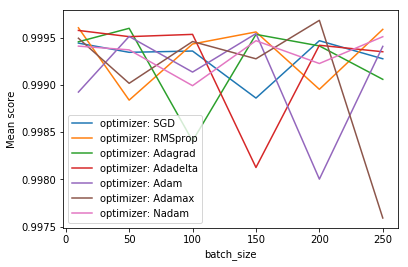

In [24]:
import matplotlib.pyplot as plt

Gammas = batch_size
Cs = optimizer

scores = [x[1] for x in grid_result.grid_scores_]
scores = np.array(scores).reshape(len(Cs), len(Gammas))

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='optimizer: ' + str(i))
plt.legend()
plt.xlabel('batch_size')
plt.ylabel('Mean score')
plt.show()

In [23]:
grid_result.grid_scores_

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.99944, std: 0.00014, params: {'optimizer': 'SGD', 'batch_size': 10},
 mean: 0.99935, std: 0.00048, params: {'optimizer': 'RMSprop', 'batch_size': 10},
 mean: 0.99936, std: 0.00042, params: {'optimizer': 'Adagrad', 'batch_size': 10},
 mean: 0.99886, std: 0.00071, params: {'optimizer': 'Adadelta', 'batch_size': 10},
 mean: 0.99947, std: 0.00048, params: {'optimizer': 'Adam', 'batch_size': 10},
 mean: 0.99928, std: 0.00032, params: {'optimizer': 'Adamax', 'batch_size': 10},
 mean: 0.99961, std: 0.00030, params: {'optimizer': 'Nadam', 'batch_size': 10},
 mean: 0.99884, std: 0.00021, params: {'optimizer': 'SGD', 'batch_size': 50},
 mean: 0.99943, std: 0.00046, params: {'optimizer': 'RMSprop', 'batch_size': 50},
 mean: 0.99956, std: 0.00017, params: {'optimizer': 'Adagrad', 'batch_size': 50},
 mean: 0.99895, std: 0.00041, params: {'optimizer': 'Adadelta', 'batch_size': 50},
 mean: 0.99959, std: 0.00025, params: {'optimizer': 'Adam', 'batch_size': 50},
 mean: 0.99946, std: 0.00025, p

In [8]:
Gammas = optimizer
Cs = batch_size

scores = [x[1] for x in grid_result.grid_scores_]
scores = np.array(scores).reshape(len(Cs), len(Gammas))

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='optimizer: ' + str(i))
plt.legend()
plt.xlabel('batch_size')
plt.ylabel('Mean score')
plt.show()

/usr/local/lib/python3.4/dist-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


ValueError: could not convert string to float: 'SGD'

In [17]:

print('The parameters of the best model are: ')
print(grid_result.best_params_)

# validator.best_estimator_ returns sklearn-wrapped version of best model.
# validator.best_estimator_.model returns the (unwrapped) keras model
best_model = grid_result.best_estimator_.model
metric_names = best_model.metrics_names
metric_values = best_model.evaluate(x_test, y_test)
for metric, value in zip(metric_names, metric_values):
    print(metric, ': ', value)

The parameters of the best model are: 
{'optimizer': 'Nadam', 'batch_size': 200}
2016/2060 [============================>.] - ETA: 0sloss :  0.0248700746373
acc :  0.990291262136
